In [1]:
from pydataset import data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
from matplotlib import pyplot as plt
iris=data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
X = iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
Y=iris[['Species']]

In [4]:
#Splitting the data into training as testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2)
len(X_train),len(X_test),len(Y_train),len(Y_test)

(120, 30, 120, 30)

In [5]:
knn=KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,Y_train)

print('Knn Score=', knn.score(X_test,Y_test)*100)

Knn Score= 96.66666666666667


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
prediction=knn.predict(X_test)
cm=confusion_matrix(Y_test,prediction)
print("Confusion Matrix is",  cm, sep='\n')

Confusion Matrix is
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [7]:
k_list=[i for i in range(1,30,2)]
k_list

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

In [8]:
miss_class=[]
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    prediction=knn.predict(X_test)
    cm=confusion_matrix(Y_test,prediction)
    miss_class.append(cm.sum() - sum(np.diag(cm)))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

In [9]:
miss_class

[2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]

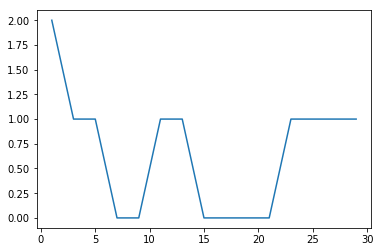

In [10]:
plt.plot(k_list,miss_class)

# -------------------------------------------------------------------------------------------

In [13]:
import os
import pandas as pd
import numpy as np

path= r"C:\Users\Lenovo\Desktop\Data Sets\Cars"
os.chdir(path)
os.listdir(path)
df = pd.read_excel("Absenteeism_at_work.xls")